# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


import keras
import tensorflow.keras.models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

from tqdm import tqdm

import groups_of_features
from groups_of_features import _frontal, _central, _parietal, _alpha, _theta, _beta, _low_gamma, _high_gamma

plt.rcParams.update({
    'mathtext.fontset': 'cm',
    'font.family': 'STIXGeneral',
    'axes.xmargin': 0,
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'axes.labelsize': 14,
    "axes.titlesize": 16,
    'xtick.labelsize': 12,
    'axes.titlepad': 20,
    'ytick.labelsize': 12,
    'grid.linewidth': 0.5
})

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

c:\Users\scbui\OneDrive\Documents\Master_BMS_PSN\Research_project_2_Unravel\Python\groups_of_features.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_csv("features_tweaked.csv")


# 2. Load dataset with features

In [2]:
features = pd.read_csv("features_tweaked.csv")

C:\Users\scbui\AppData\Local\Temp\ipykernel_18044\2585949393.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_csv("features_tweaked.csv")


# Classification model
Mag niet te veel layers hebben ivm overfitting, het aantal nodes van de input layer = het aantal features 
Activation Relu is prima, veel gebruikt, leidt to niet-lineare fit (en dat willen we)

Flatten layer is niet meer de beste manier/uberhaupt niet relevant bij 1D input

##### Classification model werkt minder goed dan regression
Waarom? Misschien omdat hij niet snapt dat de verschillende classes op elkaar volgen. Snapt hij, bij een klasse van 0, dat een voorspelling van 1 dan minder slecht is dan een voorspelling van 2?

In [30]:
np.mean(features["individual_ratings"])

3.90710932260228

In [9]:
18\5 

0.033444816053511704

In [5]:
metadata_columns = ['Respondent', 'Participant_ID', 'mean_rating', 'Participant_ID_short',
       'image_number', 'individual_ratings', 'ID', 'Type', "Missing",  "class"]

dropping_columns = metadata_columns + _central + _frontal + _parietal
# X1 = features.drop(dropping_columns, axis = 1)

# all_columns = set(X1.columns)
# columns_to_drop = set(_frontal + _central)
# columns_to_drop = columns_to_drop.intersection(all_columns)

X = features.drop(dropping_columns, axis = 1)
y = features["class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(_X, _y):
    n = X_train_scaled.shape[1]

    model = keras.models.Sequential()
    model.add(Dense(n, input_shape= X.shape[1:], activation="relu"))
    model.add(Dense(300, activation="relu"))
    model.add(Dense(200, activation="relu"))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(3, activation="softmax")) 

    model.summary()

    opt = Adam(learning_rate = 1e-4)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    return model

untrained_model = build_model(X_train_scaled, y_train)
predictions = untrained_model.predict(X_test_scaled)
test_loss, test_accuracy = untrained_model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 300)               600       
                                                                 
 dense_8 (Dense)             (None, 200)               60200     
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 3)                 153       
                                                                 
Total params: 86105 (336.35 KB)
Trainable params: 8610

In [6]:
len(y_test)

299

In [247]:
def train_model(model):
    history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1)
    return history


HIS = []
for i in range(10): #Each model is trained x times

    _m = build_model(X_train_scaled, y_train)
    history = train_model(_m)
    HIS.append(history.history)


Model: "sequential_331"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1986 (Dense)          (None, 1)                 2         
                                                                 
 dense_1987 (Dense)          (None, 300)               600       
                                                                 
 dense_1988 (Dense)          (None, 200)               60200     
                                                                 
 dense_1989 (Dense)          (None, 100)               20100     
                                                                 
 dense_1990 (Dense)          (None, 50)                5050      
                                                                 
 dense_1991 (Dense)          (None, 3)                 153       
                                                                 
Total params: 86105 (336.35 KB)
Trainable params: 86

In [248]:
np.save("class_FAA.npy", HIS)

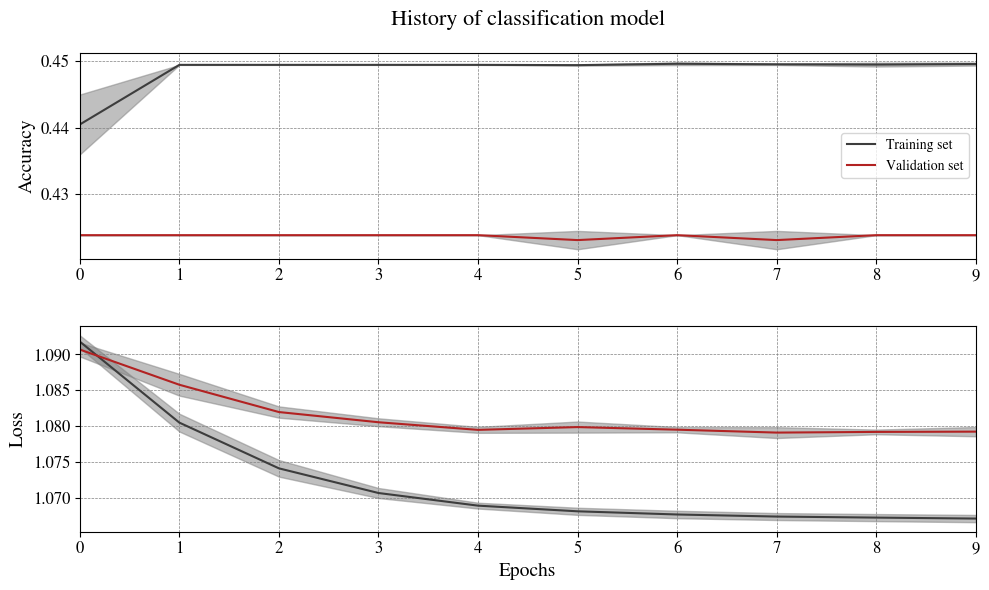

In [249]:
accuracy_mean = np.mean([history['accuracy'] for history in HIS], axis=0)
accuracy_std = np.std([history['accuracy'] for history in HIS], axis=0)
val_accuracy_mean = np.mean([history['val_accuracy'] for history in HIS], axis=0)
val_accuracy_std = np.std([history['val_accuracy'] for history in HIS], axis=0)

loss_mean = np.mean([history['loss'] for history in HIS], axis=0)
loss_std = np.std([history['loss'] for history in HIS], axis=0)
val_loss_mean = np.mean([history['val_loss'] for history in HIS], axis=0)
val_loss_std = np.std([history['val_loss'] for history in HIS], axis=0)

# Calculate 95% CI bounds
accuracy_ci = 1.96 * accuracy_std / np.sqrt(len(HIS))
val_accuracy_ci = 1.96 * val_accuracy_std / np.sqrt(len(HIS))
loss_ci = 1.96 * loss_std / np.sqrt(len(HIS))
val_loss_ci = 1.96 * val_loss_std / np.sqrt(len(HIS))

# Plot accuracy and validation accuracy in the first subplot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(accuracy_mean, color='#3D3D3D', label='Training set')
plt.fill_between(range(len(accuracy_mean)), accuracy_mean - accuracy_ci,
                 accuracy_mean + accuracy_ci, color='grey', alpha=0.5)
plt.plot(val_accuracy_mean, color='#B22222', label='Validation set')
plt.fill_between(range(len(val_accuracy_mean)), val_accuracy_mean - val_accuracy_ci,
                 val_accuracy_mean + val_accuracy_ci, color='grey', alpha=0.5)

plt.ylabel('Accuracy')
plt.title('History of classification model')
plt.legend()
plt.grid(True)

# Plot loss and validation loss in the second subplot
plt.subplot(2, 1, 2)
plt.plot(loss_mean, color='#3D3D3D', label='Training set')
plt.fill_between(range(len(loss_mean)), loss_mean - loss_ci,
                 loss_mean + loss_ci, color='grey', alpha=0.5)
plt.plot(val_loss_mean, color='#B22222', label='Validation set')
plt.fill_between(range(len(val_loss_mean)), val_loss_mean - val_loss_ci,
                 val_loss_mean + val_loss_ci, color='grey', alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.grid(True)

plt.tight_layout(h_pad=3)
# plt.savefig("class_all.pdf", format = "pdf", bbox_inches = "tight")
plt.show()


In [250]:
print(np.mean(val_accuracy_mean), np.mean(val_accuracy_std))

print(np.mean(val_loss_mean), np.mean(val_loss_std))

0.4236431270837784 0.0004460960626602173
1.0815488469600678 0.0011394288938183488


In [251]:
# Generate predictions for the test set
predictions = _m.predict(X_test_scaled)

# Get the predicted labels (indices of the maximum value in each prediction array)
predicted_labels = np.argmax(predictions, axis=1)

print(predicted_labels)

test_loss, test_accuracy = _m.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10/10 [==============================] - 0s 2ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
10/10 [==============================] - 0s 2ms/step - loss: 1.0932 - accuracy: 0.3880
Test Loss: 1.0932031869888306
Test Accuracy: 0.38795986771583557


# Define the regression model

n = X_train_scaled.shape[1]
model2 = Sequential()
model2.add(Dense(n, input_dim=n, activation='relu'))
model2.add(Dense(70, activation = "relu"))
model2.add(Dense(20, activation = "relu"))
model2.add(Dense(1, activation='linear'))  

# Compile the model 

model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ["accuracy"])

# Random model

In [4]:
RMSEs = []
labels = []

for i in range(len(y_test)):
    labels.append(y_test.iloc[i])

for i in range(10000):
    y_random_predict = np.random.choice(labels)
    RMSEs.append(np.sqrt(np.mean((y_random_predict - np.array(y_test))**2)))



NameError: name 'y_test' is not defined

# Distribution FAA/rating

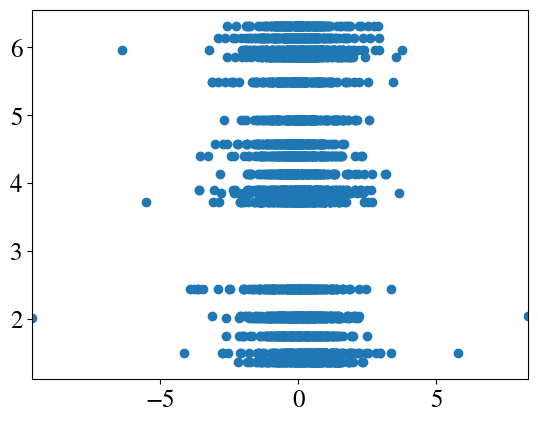

In [5]:
faa = features["FAA"]
labels = features["mean_rating"]

plt.figure()
plt.scatter(faa, labels)
plt.show()